# Assignment 2 - Part A: Exploring data

We import the necessary modules.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
import statistics


Now we load the data set, from the comma-separated training file, storing it as a list of records, where each record is represented with a dict.

In [2]:
ATTRS_ALL = ["LOCATION", "W", "FINAL_MARGIN", "SHOT_NUMBER", "PERIOD", "GAME_CLOCK", "SHOT_CLOCK", "DRIBBLES", "TOUCH_TIME", "SHOT_DIST", "PTS_TYPE", "CLOSE_DEF_DIST", "Target"]
ATTRS_CATEGORICAL = ["LOCATION", "W", "PERIOD", "PTS_TYPE", "Target"]


def load_basketball_data(filename):
    records = []
    with open(filename, 'rt') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        for row in csvreader:
            if len(row) == len(ATTRS_ALL):  # 13 attributes, including the target
                d = {}
                for i, attr in enumerate(ATTRS_ALL):
                    d[attr] = row[i] if attr in ATTRS_CATEGORICAL else float(row[i])
                records.append(d)
    return records

basketball_data = load_basketball_data("data/basketball.train.csv")

## Summary statistics and boxplots

Choose 3 numeric attributes and complete the table with the summary statistics.

| Attribute | Mean | Median | Range | Variance | AAD | MAD | IQR |
| --- | --- | --- | --- | --- | --- | --- | --- |
| SHOT_CLOCK | 12.552404221522226 | 12.4 | 24.0 | 32.96654433069982 | 4.736406998578795 | 4.247595778477775 | 8.5 |
| SHOT_DIST | 13.22916161860916 | 12.8 | 43.3 | 77.12335487898778 | 8.07462210619051 | 8.870838381390842 | 17.8 |
| CLOSE_DEF_DIST | 4.120159922461837 | 3.7 | 53.2 | 7.648605351014621 | 1.950528054622257 | 1.5798400775381634 | 3.0 |
| SHOT_NUMBER | 6.3614409175349325 | 5.0 | 35.0 | 20.555553764073327 | 3.6105975425099235 | 3.3614409175349325 | 6.0 |
| FINAL_MARGIN | 0.6593301564224753 | 2.0 | 106.0 | 177.12146016380942 | 10.682380755545257 | 8.659330156422476 | 17.0 |
| DRIBBLES | 1.9388444659828232 | 0.0 | 30.0 | 11.302809051746113 | 2.230453385850392 | 1.9388444659828232 | 2.0 |
| TOUCH_TIME | 2.692468298198853 | 1.5 | 125.0 | 8.585078225925049 | 2.0578258308815496 | 1.7924682981988531 | 2.7 |
| GAME_CLOCK | 361.2897988853889 | 363.0 | 719.0 | 40773.27060926964 | 174.64571453946385 | 174.2897988853889 | 348.0 |

In [3]:
# print(basketball_data[:1])
for attrs in set(ATTRS_ALL) - set(ATTRS_CATEGORICAL):
    data = [x[attrs] for x in basketball_data]
    _mean = statistics.mean(data)
    _median = statistics.median(data)
    _range = max(data)-min(data)
    _variance = statistics.variance(data)
    AAD = 1/len(data) * sum([abs(x-_mean) for x in data]) 
    MAD = statistics.median([abs(x-_mean) for x in data]) 
    Q1 = statistics.median(sorted(data)[:int((len(data)+1)/2)]) # take lower half of list and sort before finding median
    Q3 = statistics.median(sorted(data)[int((len(data)+1)/2):]) # take upper half of list and sort before finding median
    IQR = Q3-Q1
    print("|",attrs,"|", _mean,"|", _median,"|", _range,"|", _variance,"|", AAD,"|", MAD,"|", IQR,"|")
    


    

    
    
    



| DRIBBLES | 1.9388444659828232 | 0.0 | 30.0 | 11.302809051746113 | 2.230453385850392 | 1.9388444659828232 | 2.0 |
| SHOT_NUMBER | 6.3614409175349325 | 5.0 | 35.0 | 20.555553764073327 | 3.6105975425099235 | 3.3614409175349325 | 6.0 |
| FINAL_MARGIN | 0.6593301564224753 | 2.0 | 106.0 | 177.12146016380942 | 10.682380755545257 | 8.659330156422476 | 17.0 |
| SHOT_CLOCK | 12.552404221522226 | 12.4 | 24.0 | 32.96654433069982 | 4.736406998578795 | 4.247595778477775 | 8.5 |
| GAME_CLOCK | 361.2897988853889 | 363.0 | 719.0 | 40773.27060926964 | 174.64571453946385 | 174.2897988853889 | 348.0 |
| CLOSE_DEF_DIST | 4.120159922461837 | 3.7 | 53.2 | 7.648605351014621 | 1.950528054622257 | 1.5798400775381634 | 3.0 |
| SHOT_DIST | 13.22916161860916 | 12.8 | 43.3 | 77.12335487898778 | 8.07462210619051 | 8.870838381390842 | 17.8 |
| TOUCH_TIME | 2.692468298198853 | 1.5 | 125.0 | 8.585078225925049 | 2.0578258308815496 | 1.7924682981988531 | 2.7 |


For one of those 3 attributes, plot in a single figure 2 boxplots, one per each of the 2 classes.

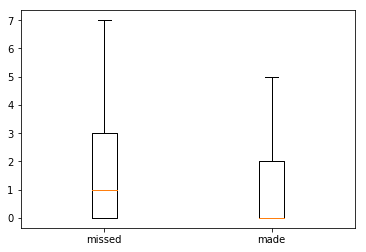

In [4]:
# TODO        
arr = [
    [x["DRIBBLES"] for x in basketball_data if x["Target"] == "missed"],
    [x["DRIBBLES"] for x in basketball_data if x["Target"] == "made"]]

tarr = np.transpose(arr)  # transpose the array, to have attributes as columns


plt.clf()  # this is needed to clear the current figure (prevents multiple labels)
plt.boxplot(tarr, labels=["missed", "made"], showfliers=False)
plt.show()


## Binarization, histograms and scatter plots

You can easily know which are all the possible values of an attribute by converting into a set its list of values.

Choose 2 categorical attributes (different from the target) and plot each distribution in a histogram.

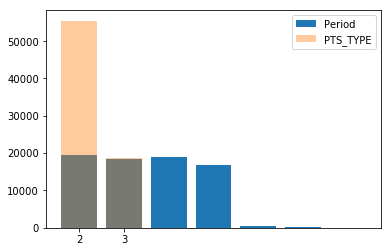

In [18]:
# TODO class er target!

# for attrs in ATTRS_CATEGORICAL:
#     attribute = [x[attrs] for x in basketball_data]
#     count = {key: attribute.count(key) for key in set(attribute)} #dictionary comprehension
#     values = [count[x] for x in sorted(count.keys())] #list comprehension
#     ticks = list(sorted(count.keys()))
#     plt.bar(range(len(values)),values, tick_label= ticks)
#     plt.title(attrs)
#     plt.show()


ax = plt.subplot(111)     
PERIOD = [x["PERIOD"] for x in basketball_data]
count = {key: PERIOD.count(key) for key in set(PERIOD)}
values = [count[x] for x in sorted(count.keys())]
ticks = list(sorted(count.keys()))
bar1 = ax.bar(range(len(values)),values, tick_label= ticks)
PTS_TYPE = [x["PTS_TYPE"] for x in basketball_data]
count = {key: PTS_TYPE.count(key) for key in set(PTS_TYPE)}
values = [count[x] for x in sorted(count.keys())]
ticks = list(sorted(count.keys()))
bar2 = ax.bar(range(len(values)),values,alpha=0.4, tick_label= ticks)

ax.legend((bar1,bar2),("Period","PTS_TYPE"))
plt.show()





Binarize all the categorical attributes (different from the target) to obtain a dataset where each record is a list of zeros and non-zero values.

In [ ]:
def binarize(record):
    record_bin = []
    # Location: either 0 or 1.
    if record['LOCATION'] == "H":
        record_bin += [1, 0]
    else:
        record_bin += [0, 1]
        
    # W: either 0 or 1.
    if record['W'] == "W":
        record_bin += [1, 0]
    else:
        record_bin += [0, 1]
        
    # Period: 7 bits.
    if record['PERIOD'] == 7:
        record_bin += [1, 0, 0, 0, 0, 0, 0]
    elif record['PERIOD'] == 6:
        record_bin += [0, 1, 0, 0, 0, 0, 0]
    elif record['PERIOD'] == 5:
        record_bin += [0, 0, 1, 0, 0, 0, 0]
    elif record['PERIOD'] == 4:
        record_bin += [0, 0, 0, 1, 0, 0, 0]
    elif record['PERIOD'] == 3:
        record_bin += [0, 0, 0, 0, 1, 0, 0]
    elif record['PERIOD'] == 2:
        record_bin += [0, 0, 0, 0, 0, 1, 0]
    else:
        record_bin += [0, 0, 0, 0, 0, 0, 1]
    
    
    # PTS: 2 bits.
    if record['PTS_TYPE'] == "3":
        record_bin += [1, 0]
    else:
        record_bin += [0, 1]
    
    return record_bin

bin_basketball_data = []
for i, val in enumerate(basketball_data[:5]):
    
    bin_vect = binarize(val)
    bin_basketball_data.append(bin_vect)
    print("[LOCATION(2bits),", "W(2bits),", "PERIOD(7bits),", "PTS_TYPE(2bits)]", "=>",bin_basketball_data[i])

Choose 2 numeric attributes and compare them in a scatter plot, with different colors per each class.

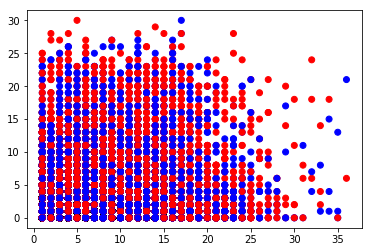

In [19]:
# TODO

     
numb_att_1 = [x["SHOT_NUMBER"] for x in basketball_data]
numb_att_2  = [x["DRIBBLES"] for x in basketball_data]
c = ["blue" if x["Target"] == "made" else "red" for x in basketball_data]

plt.clf()  # this is needed to clear the current figure (prevents multiple labels)
plt.scatter(numb_att_1, numb_att_2, c=c)
plt.show()